<a href="https://colab.research.google.com/github/Ashrockzzz2003/DSA_NoteBooks/blob/main/Week_5/PDSA_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weighted Graphs

- We assign values to edges
  - Cost, time, distance...
  - Weighted graph
- $G = (v, E), W : E → R$
- Adjacency Matrix
  - Stores weights along with edge information
  - Weight is always 0 if no edge.
- Similarly Adjacency list.

## Negative Weights

- Taxi driver case
  - Few customers (drive empty)
  - Many customers, Make weight (negative weight)
  - Find a route toward home that minimizes the cost

## Negative Cycles

- A negative cycle is one whose weight is negative
  - Sum of the weights of edges that make up the cycle.
- By repeatedly traversing a negative cycle, total cost keeps decreasing.
- Shortest paths won't make sense here.

# Shortest Path in Weighted Graphs

- Weighted shortest path need not have minimum number of edges.
- Should not have negative cycles.
- Length of path is sum of weights.

## Single Source

- Find shortest paths from a fixed vertex to every other vertex.

### Single Source Shortest Paths

- Compute shortest paths from 0 to all other vertices.

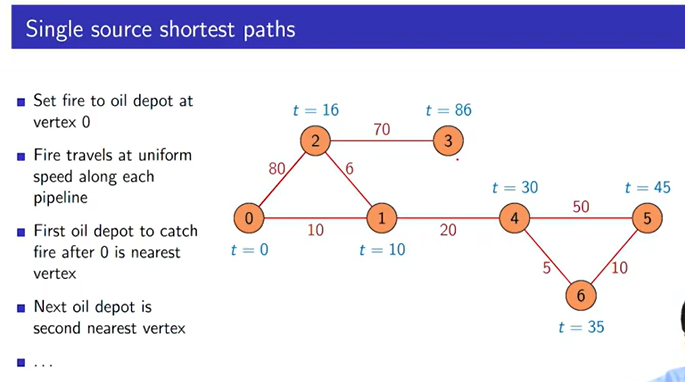

#### Approach_1 [ Dijkstra's Algorithm ]

- Assume no negative weights.
- Fire pipeline analogy!
- Compute expected burn time for each vertex
- Each time a new vertex burns, update the expected burn times of its neighbours.
- Known as `GREEDY` Strategy.

#### Limitation

- When we have negative weights, the approach fails!

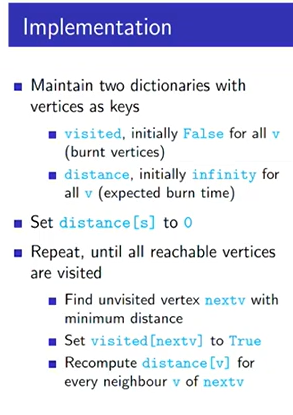

In [ ]:
import numpy as np

def dijkstra(WMat, s):
  # WMat -> Weighted Adjacency Matrix
  (rows, cols, x) = WMat.shape
  infinity = np.max(WMat)*rows + 1 # Max possible weight
  (visited, distance) = ({}, {})
  
  # Initialize
  for v in range(rows):
    (visited[v], distance[v]) = (False, infinity)
  
  distance[s] = 0
  # Look for the smallest distance vertex which is not visited.

  for u in range(rows):
    # Next distance to explore
    nextd = min([distance[v] for v in range(rows) if not visited[v]])
    
    # Get list of vertices with next distance to explore.
    nextvlist = [v for v in range(rows) if ((not visited[v]) and distance[v] == nextd)]
    
    if nextvlist == []:
      break
    
    nextv = min(nextvlist)
    visited[nextv] = True

    for v in range(cols):
      if WMat[nextv, v, 0] == 1 and (not visited[v]):
        distance[v] = min(distance[v], distance[nextv] + WMat[nextv, v, 1])
    
  return distance

In [ ]:
dedges = [(0,1,10),(0,2,80),(1,2,6),(1,4,20),(2,3,70),(4,5,50),(4,6,5),(5,6,10)]
size = 7
import numpy as np
W = np.zeros(shape=(size,size,2))
for (i,j,w) in dedges:
    W[i,j,0] = 1
    W[i,j,1] = w
print(dijkstra(W,0))

{0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}


#### Complexity

- Setting infinity itself requires $O(n^2)$
- Overall: $O(n^2)$

#### Approach_2 [Dijkstra's Algorithm]

- Same algorithm with adjacency list.

In [ ]:
def dijkstra_list(WList, s):
  infinity = 1 + len(WList.keys())*max([d for u in WList.keys() for (v,d) in WList[u]])

  (visited, distance) = ({}, {})

  # Initialize
  for v in WList.keys():
    visited[v], distance[v] = False, infinity

  distance[s] = 0
  for u in WList.keys():
    nextd = min([distance[v] for v in WList.keys() if not visited[v]])
    nextvlist = [v for v in WList.keys() if(not visited[v] and distance[v] == nextd)]

    if nextvlist == []:
      break
    
    nextv = min(nextvlist) # This is costly
    visited[nextv] = True

    for (v, d) in WList[nextv]:
      if not visited[v]:
        distance[v] = min(distance[v], distance[nextv] + d)
  
  return distance

In [ ]:
dedges = [(0,1,10),(0,2,80),(1,2,6),(1,4,20),(2,3,70),(4,5,50),(4,6,5),(5,6,10)]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in dedges:
    WL[i].append((j,d))
print(dijkstra_list(WL,0))

{0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}


#### Complexity

- It still takes $O(n^2)$

### Single Source Shortest Paths With Negative Weights

- The difficulty with negative edge weights is that we stop updating the burn time once a vertex is burnt.
- What if we allow updates even after a vertex is burnt.
- Negative Edge weights allowed but not negative Cycles!
  - Going around a cycle can only add to the length.
- Shortest route to every vertex is a $path$, no loops.

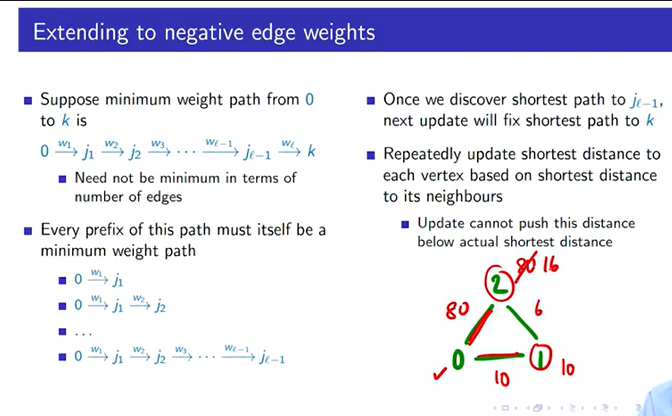

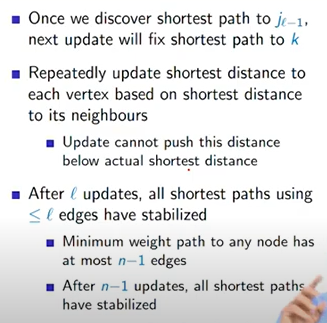

#### Approach_1 [Bellman-Ford Algorithm]

- Doesn't work when we have negative cycles in our graph.



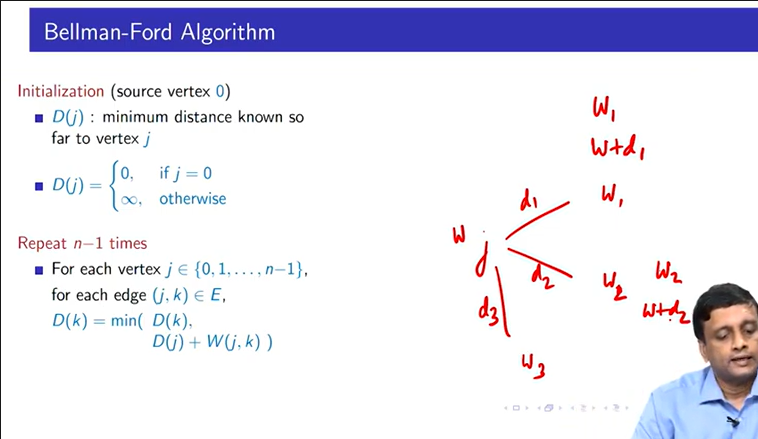

In [ ]:
import numpy as np

def bellmanford(WMat, s):
  (rows, cols, x) = WMat.shape
  infinity = np.max(WMat)*rows + 1

  # Minimum distance known so far to vertex j
  distance = {}

  # Initialize Distance
  for v in range(rows):
    distance[v] = infinity
  
  # Set Source distance 0
  distance[s] = 0

  # For every (u, v) -> Edge.
  for i in range(rows):
    for u in range(rows):
      for v in range(cols):
        if WMat[u, v, 0] == 1:
          distance[v] = min(distance[v], distance[u] + WMat[u, v, 1])
  
  return distance

In [ ]:
edges = [(0,1,10),(0,7,8),(1,5,2),(2,1,1),(2,3,1),(3,4,3),(4,5,-1),(5,2,-2),(6,1,-4),(6,5,-1),(7,6,1)]
size = 8
import numpy as np
W = np.zeros(shape=(size,size,2))
for (i,j,w) in edges:
    W[i,j,0] = 1
    W[i,j,1] = w    
print(bellmanford(W,0))

{0: 0, 1: 5.0, 2: 5.0, 3: 6.0, 4: 9.0, 5: 7.0, 6: 9.0, 7: 8.0}


#### Complexity

- Complexity of $O(n^2)$.

#### Approach_2 [Bellman Ford Algorithm with Adjacency List]

In [ ]:
def bellmanford_list(WList, s):
  infinity = 1 + len(WList.keys())*max([d for u in WList.keys() for (v, d) in WList[u]])
  distance = {}

  for v in WList.keys():
    distance[v] = infinity

  # Set Source
  distance[s] = 0

  for i in WList.keys():
    for u in WList.keys():
      for (v, d) in WList[u]:
        distance[v] = min(distance[v], distance[u] + d)

  return distance

In [ ]:
edges = [(0,1,10),(0,7,8),(1,5,2),(2,1,1),(2,3,1),(3,4,3),(4,5,-1),(5,2,-2),(6,1,-4),(6,5,-1),(7,6,1)]
size = 8
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
print(bellmanford_list(WL,0))

{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}


#### Complexity

- $O(mn)$
  - $m → number of edges$
  - $n → number of vertices$

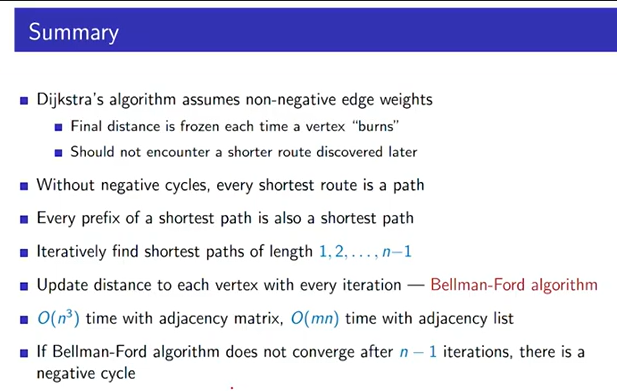

## All pairs shortest paths

- Find shortest paths between every pair of vertices $i$ and $j$.
- Run Dijkstra or Bellmann-Ford from each vertex.

### Transitive Closure of a Relation

[Transitive Closure](https://drive.google.com/file/d/10OfseDCVwdDw_RWdbzgtuRlqfQeBZNzd/view?usp=sharing)

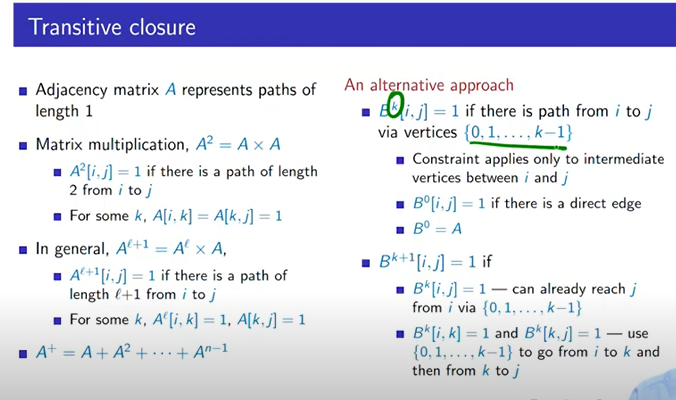

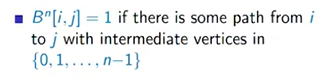

### Floyd-Warshall Algorithm

- Used to compute all pair shortest paths.

In [ ]:
def floydwarshall(WMat):
  (rows, cols, x) = WMat.shape

  infinity = np.max(WMat)*rows*rows + 1

  # Initialize the shortest path matrix
  SP = np.zeros(shape=(rows, cols, cols + 1))
  for i in range(rows):
    for j in range(cols):
      SP[i, j, 0] = infinity
  
  # Initialize with Weights
  for i in range(rows):
    for j in range(cols):
      if WMat[i, j, 0] == 1:
        SP[i, j, 0] = WMat[i, j, 1]

  # Go through every pair, 
  # Find if i -> j is shortest 
  # or 
  # i -> k + k -> j is shortest, 
  # update it
  for k in range(1, cols+1):
    for i in range(rows):
      for j in range(cols):
        SP[i, j, k] = min(SP[i, j, k - 1], SP[i, k-1, k-1] + SP[k-1, j, k-1])
  
  # return the latest updated version of SP
  return SP[:,:,cols]

In [ ]:
edges = [(0,1,10),(0,7,8),(1,5,2),(2,1,1),(2,3,1),(3,4,3),(4,5,-1),(5,2,-2),(6,1,-4),(6,5,-1),(7,6,1)]
size = 8
import numpy as np
W = np.zeros(shape=(size,size,2))
for (i,j,w) in edges:
    W[i,j,0] = 1
    W[i,j,1] = w    
print(floydwarshall(W))

[[641.   5.   5.   6.   9.   7.   9.   8.]
 [641.   1.   0.   1.   4.   2. 641. 641.]
 [641.   1.   1.   1.   4.   3. 641. 641.]
 [641.   1.   0.   1.   3.   2. 641. 641.]
 [638.  -2.  -3.  -2.   1.  -1. 638. 638.]
 [639.  -1.  -2.  -1.   2.   1. 639. 639.]
 [637.  -4.  -4.  -3.   0.  -2. 637. 637.]
 [638.  -3.  -3.  -2.   1.  -1.   1. 638.]]


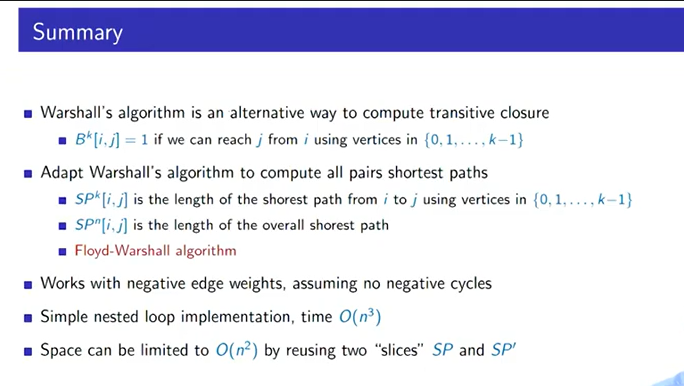

# Minimum Cost Spanning Tree

- A minimally connected graph is a tree.
  - Adding an edge to a tree cretes a loop.
  - Removing an edge disconnects the graph
- A tree that connects all the vertices of a graph `SPANNING TREE`
- Can have more than one spanning tree.
- One with the minimum weight sum is called as the `MINIMUM COST SPANNING TREE`

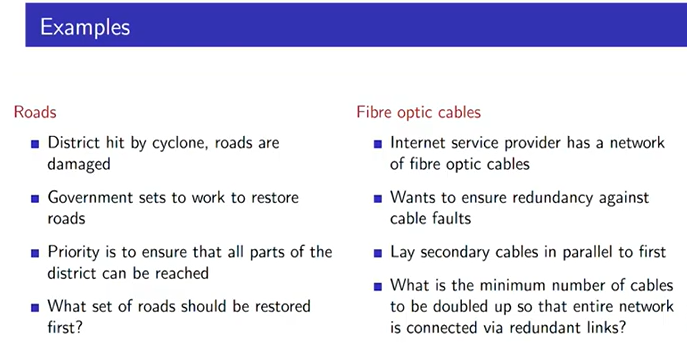

## Trees

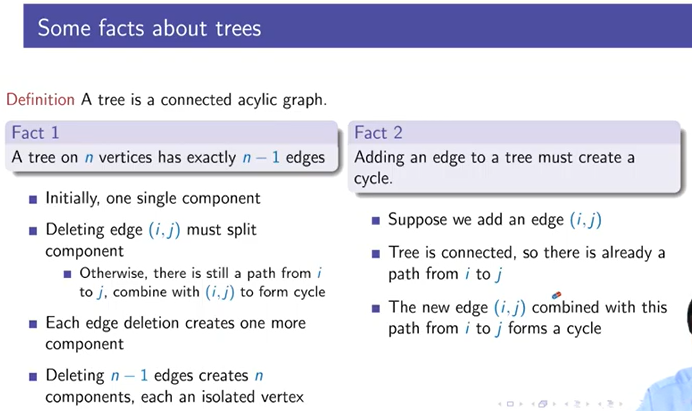

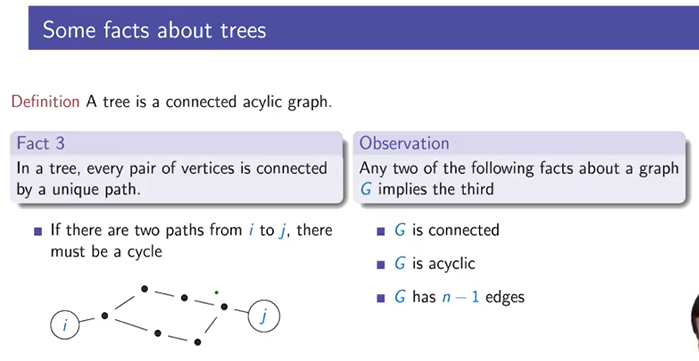

- We will use these facts about trees to build minimum cost spanning trees.

## Strategies

1. Start with the smallest edge and $grow$ a tree → `PRIM's ALGORITHM`
2. Scan the edges in acending order of weight to connect components without forming cycles → `KRUSKAL's ALGORITHM`

### Prim's Algorithm

- Incrementally frow the minimum cost spanning tree.
- Start with the smallest weighted edge overall
- Extend the current tree by adding the smallest edge from the tree to a vertex not yet in the tree.

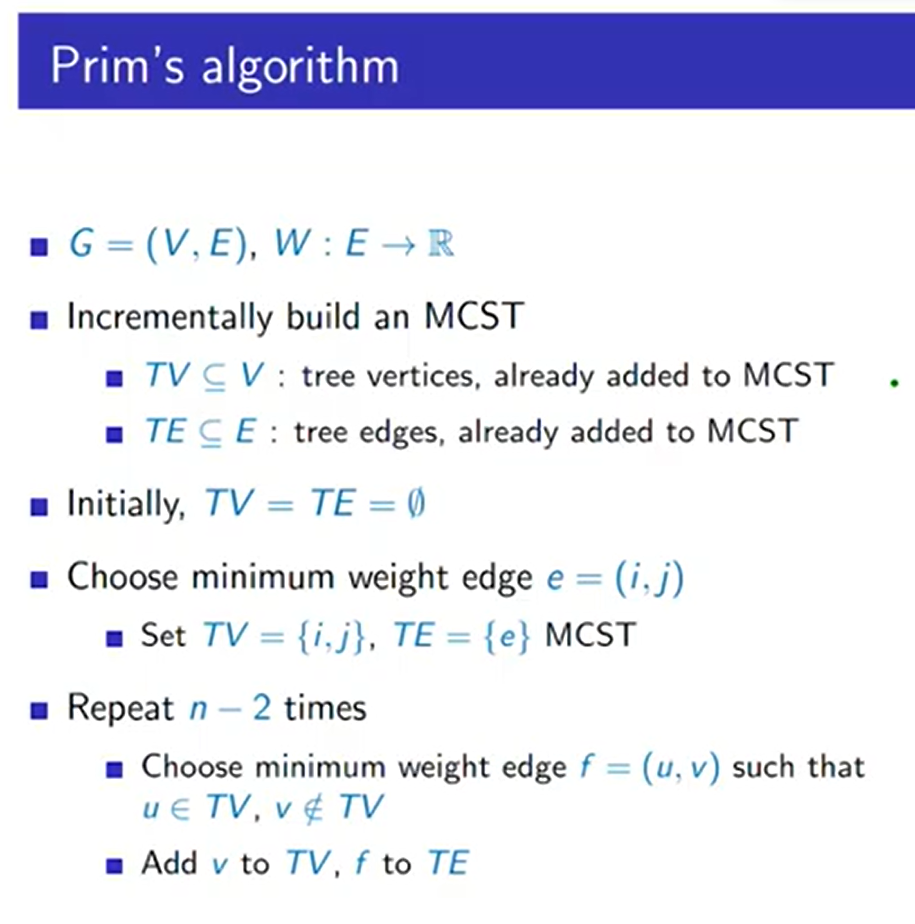

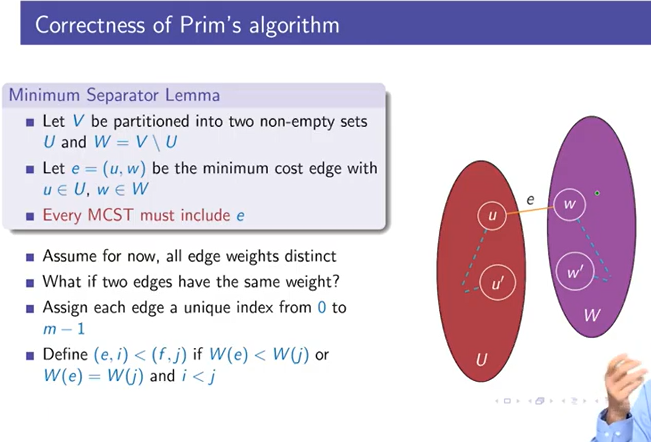

- In Prim's algorithm, $TV$ and $W - V$ \ $TV$ partition $V$
- Algorithm picks smallest edge connecting $TV$ and $W$, which must belong to every MCST
- In fact, for any $v \in V,$ { $v$ } and $V$ \ { $v$ } form a partition
- The smallest weight edge leaving any vertex must belong to every MCST
- We started with overall minimum cost edge
- Instead, can start at any vertex $v$, with $TV$ = { $v$ } and $TE =\emptyset$


#### Approach_1

In [ ]:
def prim(WList):
    """Returns the Minimum cost spanning tree using Prim's Algorithm"""
    infinity = 1 + max([d for u in WList.keys()
                           for (v,d) in WList[u]])
    (visited,distance) = ({},{})
    for v in WList.keys():
        (visited[v],distance[v]) = (False,infinity)
        
    TreeEdges = []
    visited[0] = True
    for (v,d) in WList[0]:
        distance[v] = d
    
    for i in WList.keys():
        mindist = infinity
        nextv = None
        for u in WList.keys():
            for (v,d) in WList[u]:
                if visited[u] and (not visited[v]) and d < mindist:
                    mindist = d
                    nextv = v
                    nexte = (u,v)
                    
        if nextv is None:
            break
        
        visited[nextv] = True
        TreeEdges.append(nexte)
        for (v,d) in WList[nextv]:
            if not visited[v]:
                distance[v] = min(distance[v],d)
    return (TreeEdges)

In [ ]:
dedges = [(0,1,10),(0,3,18),(1,2,20),(1,3,6),(2,4,8),(3,4,70)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 5
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
print(prim(WL))

[(0, 1), (1, 3), (1, 2), (2, 4)]


#### Complexity

- It could go all the way to $O(n^3)$

#### Approach_2

In [ ]:
def primlist2(WList):
    infinity = 1 + max([d for u in WList.keys()
                           for (v,d) in WList[u]])
    (visited,distance,nbr) = ({},{},{})
    for v in WList.keys():
        (visited[v],distance[v],nbr[v]) = (False,infinity,-1)

    visited[0] = True
    for (v,d) in WList[0]:
        distance[v] = d
        nbr[v] = 0
    
    for i in range(1,len(WList.keys())):
        nextd = min([distance[v] for v in WList.keys() if not visited[v]])
        nextvlist = [v for v in WList.keys() if (not visited[v]) and distance[v] == nextd]
        if nextvlist == []:
            break
        nextv = min(nextvlist)
       
        visited[nextv] = True
        for (v,d) in WList[nextv]:
            if not visited[v]:
                if d < distance[v]:
                    nbr[v] = nextv
                    distance[v] = d
    return(nbr)

In [ ]:
dedges = [(0,1,10),(0,3,18),(1,2,20),(1,3,6),(2,4,8),(3,4,70)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 5
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
print(primlist2(WL))

{0: -1, 1: 0, 2: 1, 3: 1, 4: 2}


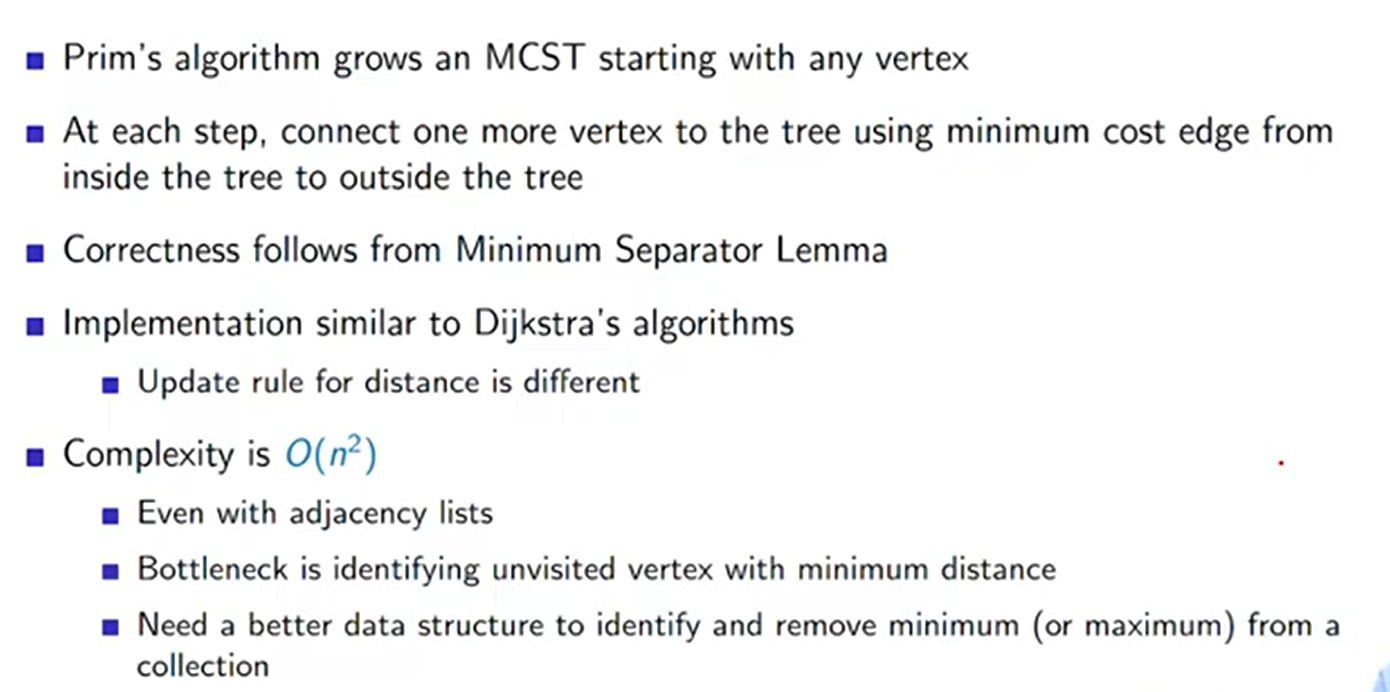

#### Complexity

- This will be $O(n^2)$

### Kruskal's Algorithm

- Start with n components, each a single vertex.
- Process edges in ascending order of cost.
- Include edge if it does not create a cycle.

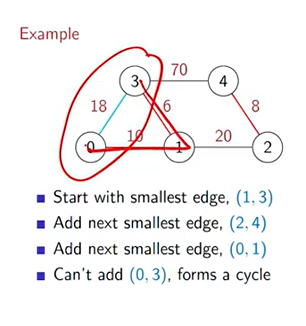

#### Approach_1

In [ ]:
def kruskal(WList):
  edges, component, TE = [], {}, []
  for u in WList.keys():
    # (weight, u, v) to sort
    edges.extend([(d, u, v) for (v, d) in WList[u]])
    component[u] = u
  
  edges.sort()
  # print(edges)
  
  for (d, u, v) in edges:
    if component[u] != component[v]:
      TE.append((u, v))
      c = component[u]
      for w in WList.keys():
        if component[w] == c:
          component[w] = component[v]

  return TE

In [ ]:
dedges = [(0,1,10),(0,2,18),(1,2,6),(1,4,20),(2,3,70),(4,5,10),(4,6,10),(5,6,5)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
print(kruskal(WL))

[(5, 6), (1, 2), (0, 1), (4, 5), (1, 4), (2, 3)]


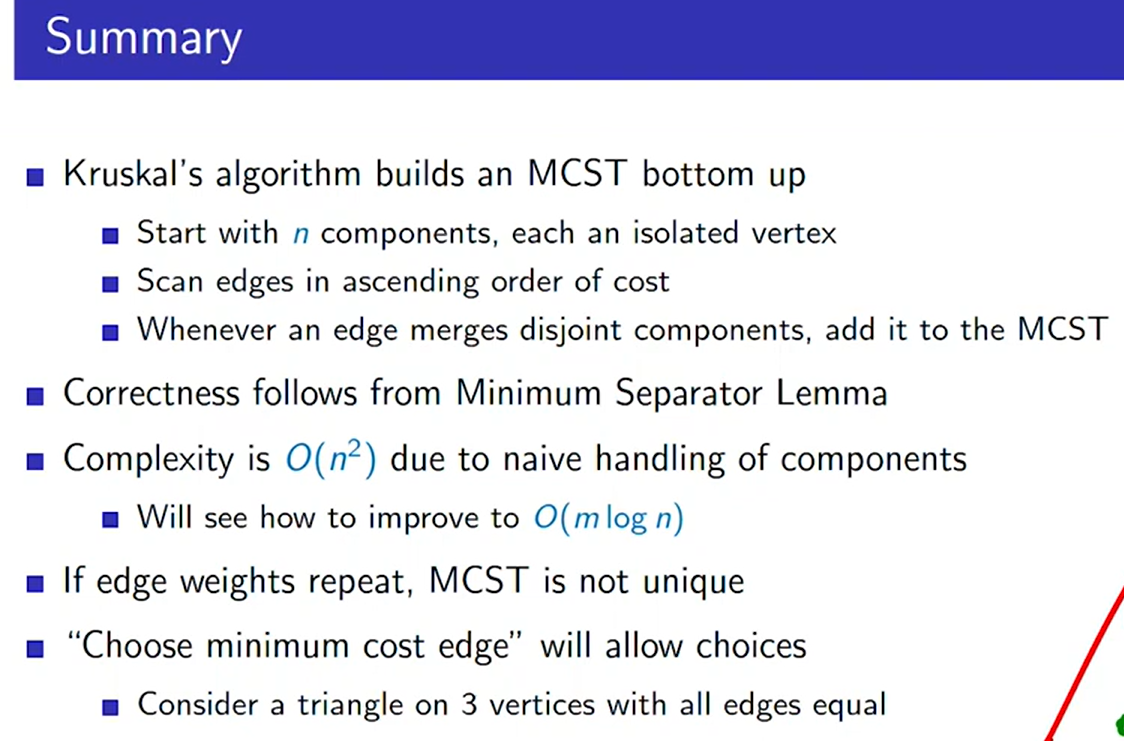

#### Complexity

- $O(n^2)$